# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import scipy.stats as stats

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_results = pd.merge(study_results,mouse_metadata, on="Mouse ID")
mouse_study_results
# Display the data table for preview


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [4]:
# Checking the number of mice.
mouse_count = mouse_study_results['Mouse ID'].nunique()
mouse_count

249

In [5]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = mouse_study_results[mouse_study_results.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
# Get the unique Mouse IDs from the duplicate rows
duplicate_mouse_ids = duplicate_mice['Mouse ID'].unique()
duplicate_mouse_ids


array(['g989'], dtype=object)

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
filtered_mouse_study_results = mouse_study_results[(mouse_study_results['Mouse ID']!= "g989")]
filtered_mouse_study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [8]:
# Checking the number of mice in the clean DataFrame.
cleanded_df = filtered_mouse_study_results['Mouse ID'].nunique()
cleanded_df

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_mean = filtered_mouse_study_results.groupby(['Drug Regimen'])["Tumor Volume (mm3)"].mean()
drug_median = filtered_mouse_study_results.groupby(['Drug Regimen'])["Tumor Volume (mm3)"].median()
drug_var = filtered_mouse_study_results.groupby(['Drug Regimen'])["Tumor Volume (mm3)"].var()
drug_sd = filtered_mouse_study_results.groupby(['Drug Regimen'])["Tumor Volume (mm3)"].std()
drug_SEM = filtered_mouse_study_results.groupby(['Drug Regimen'])["Tumor Volume (mm3)"].sem()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
clean_drug_df = pd.DataFrame({
    'Mean Tumor Volume':drug_mean,
    'Median Tumor Volume':drug_median,
    'Tumor Volume Variance':drug_var,
    'Tumor Volume Std. Dev.':drug_sd,
    'Tumor Volume Std. Err.':drug_SEM
})
clean_drug_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
clean_drug_ad_df = filtered_mouse_study_results.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])
# Using the aggregation method, produce the same summary statistics in a single line
clean_drug_ad_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, '# of Observed Timepoints')

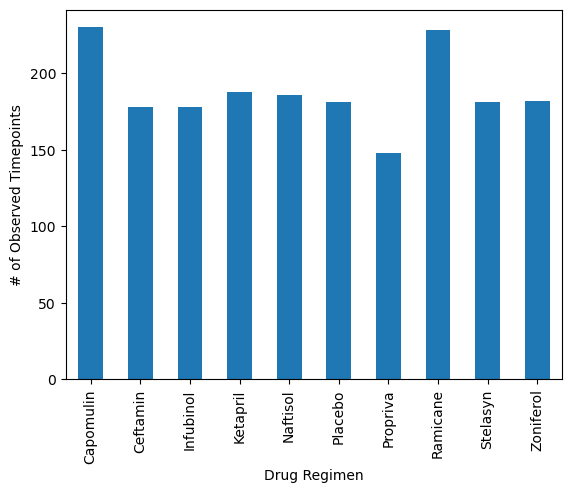

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
#filtered_mouse_study_results.plot(clean_drug_df["Drug Regimen"], filtered_mouse_study_results.groupby(["Drug Regimen"]).count(), kind = "bar")
count = filtered_mouse_study_results.groupby(["Drug Regimen"]).size()
count.plot(kind="bar")
plt.ylabel("# of Observed Timepoints")

Text(0, 0.5, '# of Observed Timepoints')

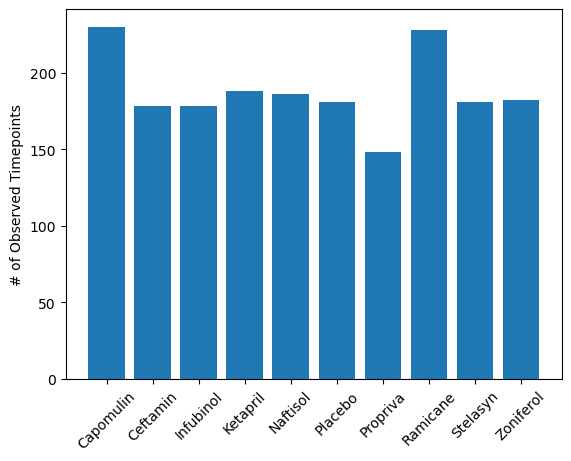

In [22]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# list_drug = filtered_mouse_study_results.groupby(["Drug Regimen"]).unique()
list_drugs = count.index
plt.bar(list_drugs, count)
plt.xticks(rotation=45)
plt.ylabel("# of Observed Timepoints")

Text(0.5, 1.0, 'Sex')

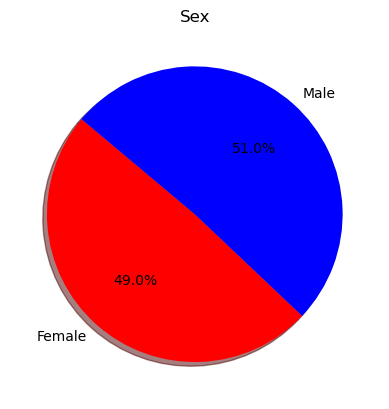

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mf_count = filtered_mouse_study_results.groupby(["Sex"]).size()
x_axis = mf_count.index
mf_count.plot.pie(y=mf_count, labels=x_axis, colors=["red", "blue"],
        autopct="%1.1f%%", shadow=True, startangle=140 )
plt.title("Sex")

Text(0.5, 1.0, 'Sex')

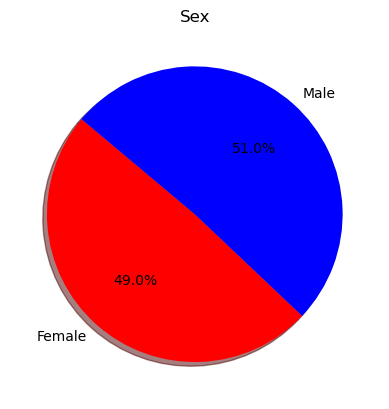

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mf_count = filtered_mouse_study_results.groupby(["Sex"]).size()
x_axis = mf_count.index
plt.pie(mf_count, labels=x_axis, colors=["red", "blue"],
        autopct="%1.1f%%", shadow=True, startangle=140 )
plt.title("Sex")

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse_tumor_f = filtered_mouse_study_results.groupby(["Mouse ID"])["Timepoint"].max()
#mouse_tumor_df = pd.DataFrame(mouse_tumor_f)
# mouse_tumor_df = mouse_tumor_df.reset_index()
# mouse_tumor_df
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_results = pd.merge(filtered_mouse_study_results, mouse_tumor_f, on = ["Mouse ID", "Timepoint"])

#final_tumor_results
# final_tumor_results.rename(columns={"Timepoint_x":"Timepoint", "Timepoint_y":"Timepoint Max"}, inplace=True)

search_name = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

for i in search_name:
    t4_drugs_names = final_tumor_results[final_tumor_results["Drug Regimen"].isin(search_name)]

t4_drugs_names
# drug_ft = t4_drugs_names.groupby(["Drug Regimen"])["Timepoint Max"]
# #t4_drugs_names
# dr_df = pd.DataFrame(drug_ft)
# # drug_ft
# dr_df
#248


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
29,c326,5,36.321346,0,Infubinol,Female,18,25
30,c139,45,72.226731,2,Infubinol,Male,11,28
31,v339,5,46.250112,0,Infubinol,Male,20,26
32,a577,30,57.031862,2,Infubinol,Female,6,25
...,...,...,...,...,...,...,...,...
243,t565,45,34.455298,0,Capomulin,Female,20,17
244,i557,45,47.685963,1,Capomulin,Female,1,24
245,m957,45,33.329098,1,Capomulin,Female,3,19
246,f966,20,30.485985,0,Capomulin,Male,16,17


In [16]:
# Put treatments into a list for for loop (and later for plot labels)
search_name

# Create empty list to fill with tumor vol data (for plotting)
f_tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for i in search_name:
    filtered_df = t4_drugs_names[t4_drugs_names["Drug Regimen"]==i]
   # print(filtered_df)
    quartiles = filtered_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
    lowerq = quartiles[.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

# print(f"The lower quartile of temperatures is: {lowerq}")
# print(f"The upper quartile of temperatures is: {upperq}")
# print(f"The interquartile range of temperatures is: {iqr}")
# print(f"The the median of temperatures is: {quartiles[.5]} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    # if filtered_df["Tumor Volume (mm3)"] is less than lower_bound then 
    # outliers = append list 

    filtered_df2 = filtered_df[(filtered_df["Tumor Volume (mm3)"]<lower_bound) | (filtered_df["Tumor Volume (mm3)"]>upper_bound)]
    filtered_df3 = filtered_df2["Tumor Volume (mm3)"]
    #print(filtered_df3)
    # print(f"{i} values below {lower_bound} could be outliers.")
    # print(f"{i} values above {upper_bound} could be outliers.")
    # col_ext = ["Drug Regimen", "Tumor Volume (mm3)"]
    # for column_name in col_ext:
    f_tumor_vol.append(filtered_df["Tumor Volume (mm3)"])
    #print(f"{i}'s potential outliers: {filtered_df3}")
print(f_tumor_vol)



    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


[0      38.982878
224    38.753265
225    32.377357
226    23.343598
227    38.939633
228    28.484033
229    41.483008
230    40.728578
231    46.539206
232    31.023923
233    38.125164
234    40.658124
235    36.041047
236    37.311846
237    41.581521
238    31.896238
239    40.159220
240    37.074024
241    38.846876
242    39.952347
243    34.455298
244    47.685963
245    33.329098
246    30.485985
247    28.430964
Name: Tumor Volume (mm3), dtype: float64, 58     38.342008
59     36.561652
60     31.560470
61     38.407618
62     43.047543
63     37.311236
64     36.134852
65     44.183451
66     22.050126
67     33.397653
69     37.225650
70     32.978522
71     33.562402
72     29.128472
73     38.810366
74     40.667713
75     30.564625
76     43.166373
77     31.095335
78     30.276232
79     40.659006
80     30.638696
81     43.419381
110    45.220869
222    36.374510
Name: Tumor Volume (mm3), dtype: float64, 29     36.321346
30     72.226731
31     46.250112
32     57.0318

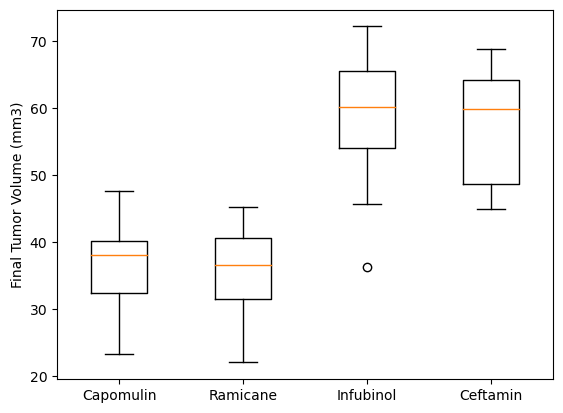

In [17]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
#y-dat = volume


fig1, ax1 = plt.subplots()
#ax1.set_title('Temperatures at LAX')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(f_tumor_vol, labels=search_name)
# for i in range(len(search_name)):
#     y_pos = f_tumor_vol.values[:, i].max() + 1
#     ax1.text(i + 1, y_pos, search_name[i], ha='center', va='bottom')
plt.show()

## Line and Scatter Plots

Text(0.5, 1.0, 'Capomulin trement of mouse l509')

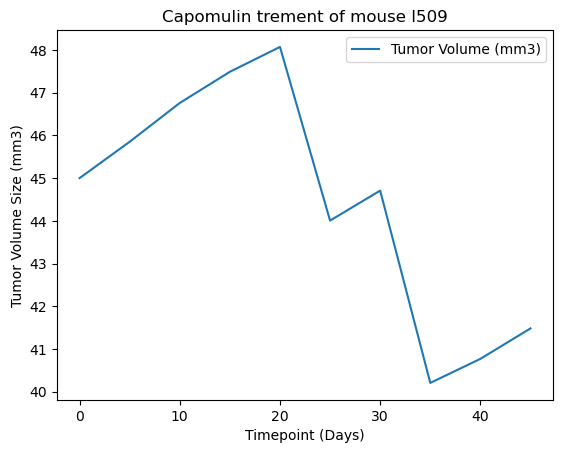

In [18]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
one_mouse = filtered_mouse_study_results[filtered_mouse_study_results["Mouse ID"].str.contains("l509")]
one_mouse.plot('Timepoint', 'Tumor Volume (mm3)')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume Size (mm3)')
plt.title('Capomulin trement of mouse l509')

Text(0, 0.5, 'Average Tumor Volume (mm3)')

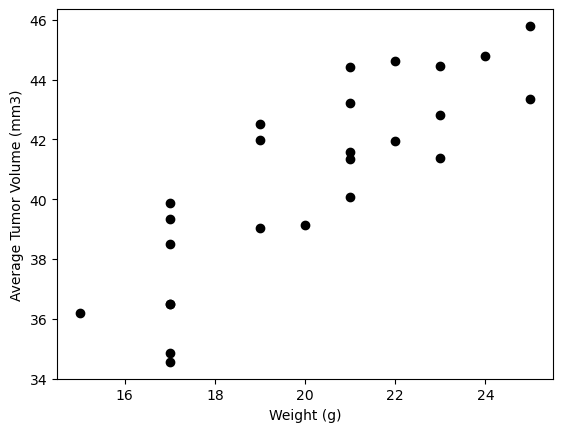

In [21]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
#filtered_df = t4_drugs_names[t4_drugs_names["Drug Regimen"]==i]
drug_cap = filtered_mouse_study_results[filtered_mouse_study_results['Drug Regimen']=="Capomulin"]
drug_cap_df = pd.DataFrame(drug_cap)
tumor_mean = drug_cap_df.groupby(['Mouse ID'])['Tumor Volume (mm3)'].mean()
tumor_mean_df = pd.DataFrame(tumor_mean)
tumor_mean_dfx = tumor_mean_df.reset_index(drop=False)

#tumor_mean
mouse_weight_no_dup = drug_cap_df.drop_duplicates(subset="Mouse ID")
mouse_weight = mouse_weight_no_dup[['Mouse ID', 'Weight (g)']]
weight_tumor = pd.merge(mouse_weight, tumor_mean_dfx, on='Mouse ID')
#weight_tumor                
#mouse_weight
plt.scatter(weight_tumor['Weight (g)'],weight_tumor['Tumor Volume (mm3)'], marker='o', color='black')

plt.xlabel('Weight (g)')
plt.ylabel("Average Tumor Volume (mm3)")


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


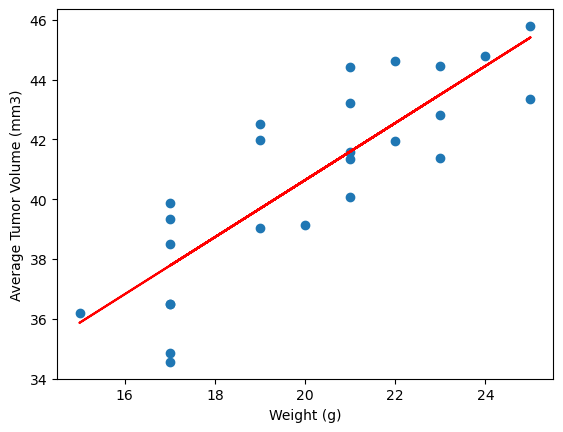

In [20]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
x_values = weight_tumor['Weight (g)']
y_values = weight_tumor['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
correlation_coeffiecient = stats.pearsonr(x_values,y_values)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation_coeffiecient[0],2)}")
plt.xlabel('Weight (g)')
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()